In [64]:
import matplotlib.pyplot as plt
from math import pi,exp,sin,tanh,cos,fabs
#%matplotlib inline
%matplotlib nbagg
import os

In [184]:
class Hp: # Hysteresis point
    def __init__(self,x0=0,a=1,b=-1,h=1):
        
        self.x0=x0
        self.xp=0
        self.a=a
        self.b=b
        self.last_state=0
        self.y=0
        self.trw = 2*exp(1)/(a-b) # Transition width
        if h>=0:
            self.h=h
            self.shift=0
        elif h <0:
            self.h=fabs(h)
            self.shift=h
        
    def HysPPar(self): # Test func
        
        print(' {0:.3f}  {1:.3f}  {2:.3f} {3:.3f}'.format(self.b+self.x0,self.x0,self.a+self.x0,self.h))
        bb=self.b
        aa=self.a
        xx=self.x0
        plt.plot([bb+xx,bb+xx,bb+xx],[0,self.h/2,self.h],'g-*') #left side
        plt.plot([aa+xx,aa+xx,aa+xx],[0,self.h/2,self.h],'r-*') #left side
        
    def inr(self,x): # Реле с прямоугольной петлей 
        
        if (x > self.x0+self.a) and (self.last_state==0):
            self.last_state,self.y=1,self.h+self.shift
          
        if (x < self.x0+self.b) and (self.last_state==1):
            self.last_state,self.y=0,0+self.shift
        
        return self.y  
    
    def ins(self,x): # Реле с сигмоидальной петлей
        
        dx=x-self.xp 
        if dx>0:
                    tempy=self.h*0.5*(tanh(self.trw*(x+self.b - self.x0))-tanh(self.trw*(self.xp+self.b - self.x0)))  

                    if  self.h*(0.5+0.5*(tanh(self.trw*(x +self.b - self.x0)))) <self.y+tempy:
                        if self.y+tempy < self.h:
                             self.y+=tempy
                    else:
                        self.y=self.h*(0.5+0.5*(tanh(self.trw*(x +self.b - self.x0))))
        elif dx <0:
                    tempy=self.h*0.5*(tanh(self.trw*(x+self.a - self.x0))-tanh(self.trw*(self.xp+self.a - self.x0)))  

                    if  self.h*(0.5+0.5*(tanh(self.trw*(x +self.a - self.x0)))) > self.y+tempy:
                        if self.y+tempy > 0:  

                            self.y+=tempy
                    else:
                        self.y=self.h*(0.5+0.5*(tanh(self.trw*(x +self.a - self.x0))))
        self.xp=x 
        return self.y +self.shift

In [224]:
class Preisach_model():
    
    def __init__(self,HysType='Rec'): #rectangle sigmoid type
            
        #Main_hysteresis_loop
        self.P_num=0 # Количество точек в основной кривой
        self.relays=[]
        self.dy=[]
        self.px=0                       
        self.Ht=HysType # For axisymmetric curves 
        
        
    def main_loop_set(self, loop,fdata=0,k=1,InDaType='Sym'):
        u'''Data format default [x1,y1],...,[xn,yn], [x1..xn],[y1..yn]
            input data type , for symmetric from main curve use Sym -- defult value
            for not symmetric use NonSym
        
        
        '''        
        
        
        if fdata==0: # данные должны быть представленны в виде 2-х списков
            
            m_x=loop[0]
            m_y=loop[1]
            
            
        self.P_num = len(m_x)
        
        dy=[m_y[i]-m_y[i-1]for i in range(1,len(m_y))] +[0]
        
        for i in range(len(m_x)):
            if i==0:            
                a=(m_x[i+1]-m_x[i])*k 
                b=-a
            elif i==len(m_x):  
                b=-(m_x[i]-m_x[i-1])*k 
                a=-b
            elif i< len(m_x)-1: 
                a=(m_x[i+1]-m_x[i])*k  
                b=-(m_x[i]-m_x[i-1])*k
                
            self.relays.append(Hp(m_x[i],a,b,dy[i]))
               
        
        if InDaType == "Sym": # For symmetric hysteresis
            for i in range(len(m_x)):
                
                if i==0:            
                    a=(m_x[i+1]-m_x[i])*k 
                    b=-a
                elif i==len(m_x):  
                    b=-(m_x[i]-m_x[i-1])*k 
                    a=-b
                elif i< len(m_x)-1: 
                    a=(m_x[i+1]-m_x[i])*k  
                    b=-(m_x[i]-m_x[i-1])*k

                self.relays= [Hp(-m_x[i],a,b,-dy[i])]+self.relays
            
            
                    
                
    def x(self,x):
        
        if type(x) == list:
            
            y=[]    
            for i in x:
                y.append(self.Preisach(i)) 
            return y 
        
        elif type(x) == int or float:
            
            return self.Preisach(x)
        
    def Preisach(self,xin):
        y=0
          
        for i in range(len(self.relays)):

            if self.Ht == 'Rec':y+=self.relays[i].inr(xin)
            if self.Ht == 'Sig':y+=self.relays[i].ins(xin)
            
            
        return y

<IPython.core.display.Javascript object>


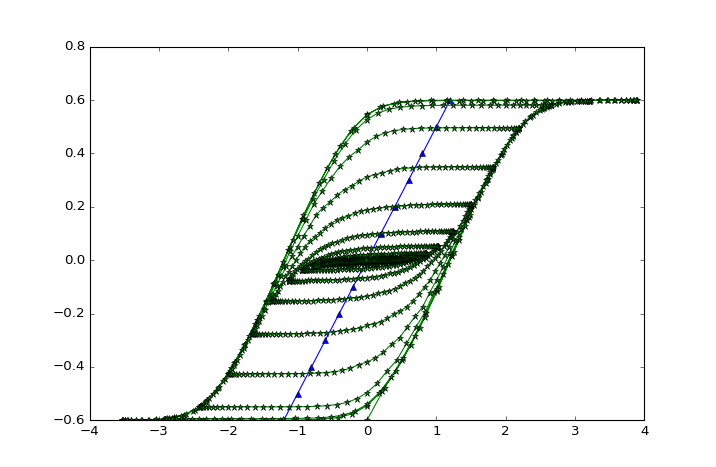

In [227]:
yl=[0,0.1,0.2,0.3,0.4,0.5,0.6]
xl=[i*0.2 for i in range(len(yl))]

var=Preisach_model('Sig')
var.main_loop_set([xl]+[yl],k=6)

x=[1.5*exp(1)*sin(i*pi/50)*exp(-i*0.0019)-shift for i in range(0,1500) ]
y=[]
for i in x:
    y.append(var.x(i))
plt.plot([-xl[i] for i in range(len(xl)-1,0,-1)]+xl,[-yl[i] for i in range(len(yl)-1,0,-1)]+yl,'^-')
plt.show()
plt.plot(x,y,'-*')
plt.show()

<IPython.core.display.Javascript object>


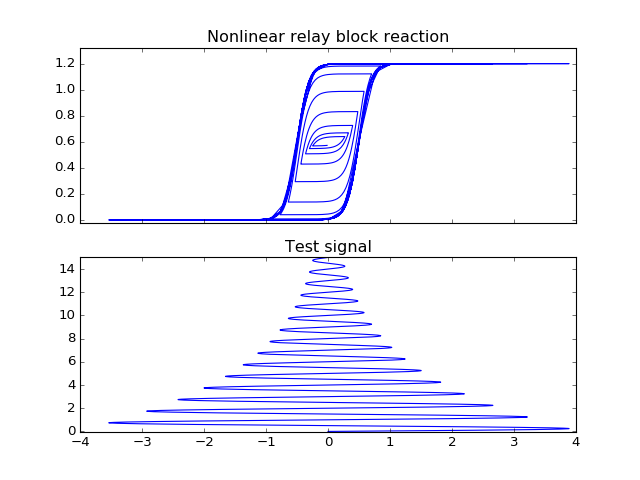

In [209]:
# test
shift=0.00
out=Hp(x0=0,a=0.5,b=-0.5,h=1.2)
x=[1.5*exp(1)*sin(i*pi/50)*exp(-i*0.0019)-shift for i in range(0,1500) ] #*exp(-i*0.025)
y=[]
for i in x:
    y.append(out.ins(i)) 
ft, axarrt = plt.subplots(2, sharex=True)
axarrt[0].plot(x,y)
axarrt[0].set_title(u'Nonlinear relay block reaction')
axarrt[0].axis([-4,4,-0.02,out.h*1.1])


axarrt[1].set_title(u'Test signal')
axarrt[1].plot(x,[i*0.01 for i in range(0,1500)],'-')
axarrt[1].axis([-4,4,-0.05,15])

plt.show()